In [134]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import seaborn as sns

In [135]:
result = pd.read_csv('./static/data/cctv.csv',index_col=0)

In [136]:
result

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
광진구,1581,111.930295,361923,348064,13859,50047,3.829268,13.828079,0.436833,534.003262
구로구,3227,72.106667,435751,405579,30172,69312,6.924138,15.906332,0.740561,898.416871
금천구,1634,112.483745,249641,232157,17484,39361,7.003657,15.767041,0.654540,156.178337
노원구,1906,42.026826,529532,525486,4046,84612,0.764071,15.978638,0.359940,693.885798


In [137]:
fp1 =np.polyfit(result['인구수'], result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
fy = f1(fx)

In [138]:
result['오차'] = np.abs(result['소계'] - f1(result['인구수']))
result_sort = result.sort_values('오차', ascending=False)


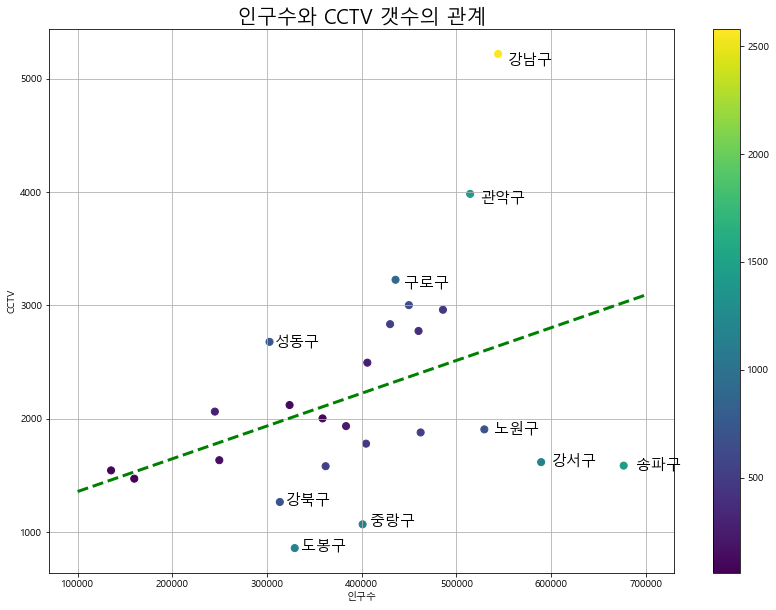

In [139]:
plt.figure(figsize=(14,10))
plt.scatter(result['인구수'], result['소계'], c=result['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(result_sort['인구수'][i]*1.02, result_sort['소계'][i]*0.98,
             result_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 CCTV 갯수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()    
plt.savefig('static/img/cctv.png')

In [140]:
list(result.columns)[:-1]

['소계', '최근증가율', '인구수', '내국인', '외국인', '고령자', '외국인비율', '고령자비율', 'cctv비율']

In [141]:
result = result.round(2)
result.reset_index(inplace=True)
result.head()

,구별,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
0,강남구,5221,52.17,544085,539235,4850,73942,0.89,13.59,0.96,2579.01
1,강동구,1879,82.96,462275,458058,4217,68798,0.91,14.88,0.41,526.32
2,강북구,1265,83.07,313550,309996,3554,62951,1.13,20.08,0.40,710.06
3,강서구,1617,77.89,589536,583544,5992,88052,1.02,14.94,0.27,1156.47
4,관악구,3985,99.15,514555,498574,15981,78206,3.11,15.20,0.77,1428.44


In [156]:
res = result[['구별','소계','최근증가율','인구수','내국인','외국인','고령자']]

In [157]:
res

,구별,소계,최근증가율,인구수,내국인,외국인,고령자
0,강남구,5221,52.17,544085,539235,4850,73942
1,강동구,1879,82.96,462275,458058,4217,68798
2,강북구,1265,83.07,313550,309996,3554,62951
3,강서구,1617,77.89,589536,583544,5992,88052
4,관악구,3985,99.15,514555,498574,15981,78206
5,광진구,1581,111.93,361923,348064,13859,50047
6,구로구,3227,72.11,435751,405579,30172,69312
7,금천구,1634,112.48,249641,232157,17484,39361
8,노원구,1906,42.03,529532,525486,4046,84612
9,도봉구,858,66.60,329300,327248,2052,61388


In [164]:
tmp = list(res.values)

In [171]:
val = res.values

In [153]:
list(res.columns)

['소계', '최근증가율', '인구수', '내국인', '외국인', '고령자']

In [155]:
res.head()

,소계,최근증가율,인구수,내국인,외국인,고령자
0,5221,52.17,544085,539235,4850,73942
1,1879,82.96,462275,458058,4217,68798
2,1265,83.07,313550,309996,3554,62951
3,1617,77.89,589536,583544,5992,88052
4,3985,99.15,514555,498574,15981,78206
